In [72]:
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [73]:
origin = read_excel("../../fish2.xlsx")
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


#### 산점도 그래프와 추세선 확인

In [74]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

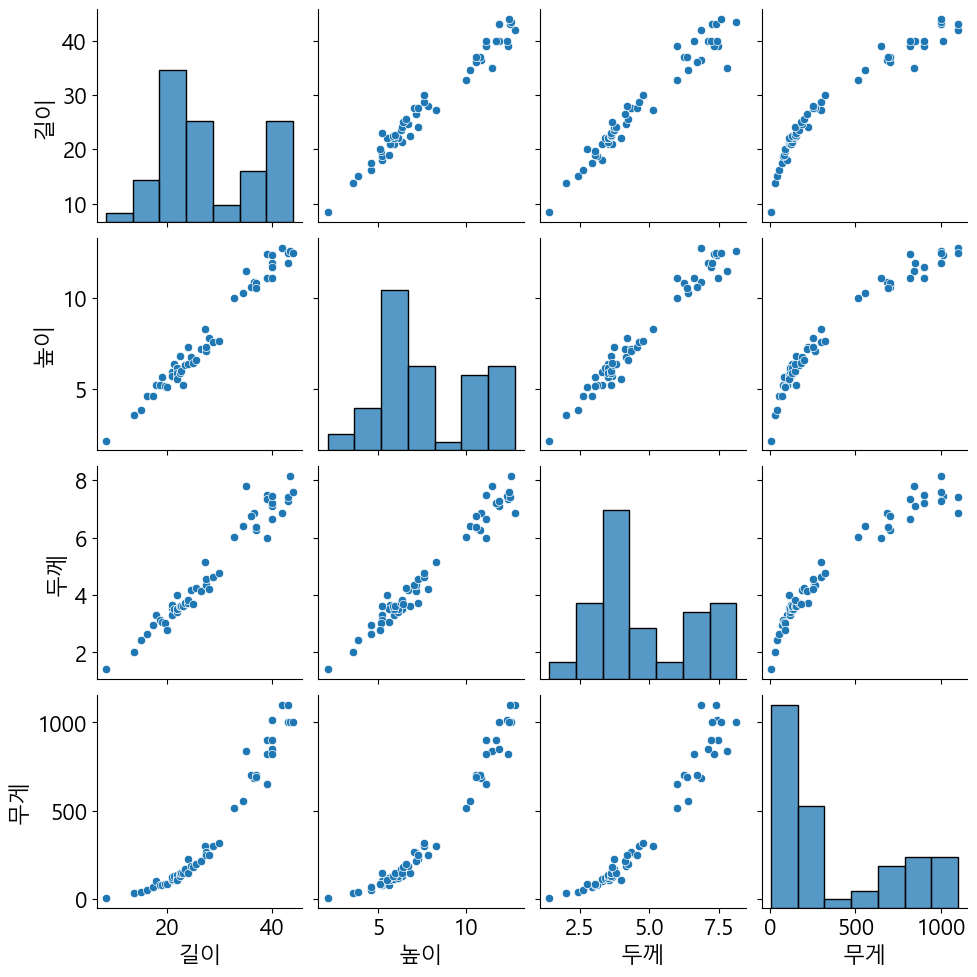

In [75]:
plt.figure(figsize = (30,30))
sb.pairplot(origin)
plt.show()
plt.close()

> 선형보다 곡선의 관계가 보이기 때문에 polynomial Transformation이 필요하다.

## 05. 데이터셋 분할하기

In [76]:
np.random.seed(777)

In [77]:
x = origin[['길이','높이','두께']]
y = origin[['무게']]
x.shape, y.shape


((56, 3), (56, 1))

In [78]:
x_scaler = StandardScaler()
x_scale = x_scaler.fit_transform(x)
x_scale.shape

(56, 3)

In [79]:
poly = PolynomialFeatures(degree=2, include_bias=False)
fit = poly.fit_transform(x)
columns_names= poly.get_feature_names_out()
columns_names

array(['길이', '높이', '두께', '길이^2', '길이 높이', '길이 두께', '높이^2', '높이 두께',
       '두께^2'], dtype=object)

#### 표준화한 변수들 다항식으로 변환하기

In [80]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
fit = poly.fit_transform(x_scale)
x2 = DataFrame(fit, columns = columns_names)
x2.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479
1,-1.587434,-1.518703,-1.560774,2.519946,2.410841,2.477625,2.306460,2.370352,2.436014
2,-1.442032,-1.417039,-1.316328,2.079457,2.043416,1.898188,2.008000,1.865289,1.732721
3,-1.307815,-1.147103,-1.202633,1.710381,1.500199,1.572822,1.315845,1.379544,1.446326
4,-1.173599,-1.147103,-1.026405,1.377334,1.346238,1.204588,1.315845,1.177393,1.053508


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
8,-0.927534,-0.954292,-0.969558,0.860320,0.885138,0.899298,0.910672,0.925241,0.940042
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479
15,-0.659101,-0.779008,-0.696689,0.434414,0.513445,0.459188,0.606854,0.542726,0.485375
26,-0.368297,-0.396891,-0.327179,0.135643,0.146174,0.120499,0.157523,0.129854,0.107046
51,1.577847,1.731046,1.207709,2.489601,2.731326,1.905580,2.996521,2.090600,1.458561
2,-1.442032,-1.417039,-1.316328,2.079457,2.043416,1.898188,2.008000,1.865289,1.732721
6,-1.028197,-0.933258,-0.924079,1.057189,0.959573,0.950136,0.870970,0.862404,0.853923
4,-1.173599,-1.147103,-1.026405,1.377334,1.346238,1.204588,1.315845,1.177393,1.053508
42,1.018610,1.043936,0.860938,1.037567,1.063364,0.876960,1.089803,0.898764,0.741214
30,-0.066310,0.160509,0.224244,0.004397,-0.010643,-0.014870,0.025763,0.035993,0.050285


## 06. 모델 개발
모델 정의

In [103]:
model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (len(x_train.columns), )  ))
model.add(Dense(32, activation = 'relu'))

# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
model.add(Dense(1,  activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


### 학습하기


In [104]:
result = model.fit(x_train, y_train,  epochs= 500, validation_data= (x_test, y_test),
                            callbacks = [EarlyStopping(monitor="val_loss", patience = 10, verbose = 1),
                            ReduceLROnPlateau(monitor = 'val_loss' ,patience =3, factor = 0.5, min_lr = 0.001, verbose = 1)
                            ])

Epoch 1/500
2/2 [==============================] - 1s 361ms/step - loss: 283843.8125 - mae: 396.0231 - val_loss: 222016.2188 - val_mae: 351.4419 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 94ms/step - loss: 283728.5625 - mae: 395.9182 - val_loss: 221917.3906 - val_mae: 351.3562 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 70ms/step - loss: 283608.1562 - mae: 395.8176 - val_loss: 221827.6719 - val_mae: 351.2752 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 54ms/step - loss: 283503.5000 - mae: 395.7278 - val_loss: 221741.1094 - val_mae: 351.1966 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 53ms/step - loss: 283411.6875 - mae: 395.6409 - val_loss: 221663.2188 - val_mae: 351.1227 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 49ms/step - loss: 283315.9375 - mae: 395.5527 - val_loss: 221583.9375 - val_mae: 351.0485 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 77m

## 07. 학습 결과 평가

In [105]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace = True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,283843.812500,396.023102,222016.218750,351.441895,0.001
2,283728.562500,395.918213,221917.390625,351.356171,0.001
3,283608.156250,395.817596,221827.671875,351.275238,0.001
4,283503.500000,395.727753,221741.109375,351.196594,0.001
5,283411.687500,395.640900,221663.218750,351.122650,0.001
...,...,...,...,...,...
489,2737.467041,39.847332,4006.265137,37.385162,0.001
490,2714.729004,39.608780,4040.916260,37.336639,0.001
491,2686.541504,39.225651,4092.109375,37.317169,0.001


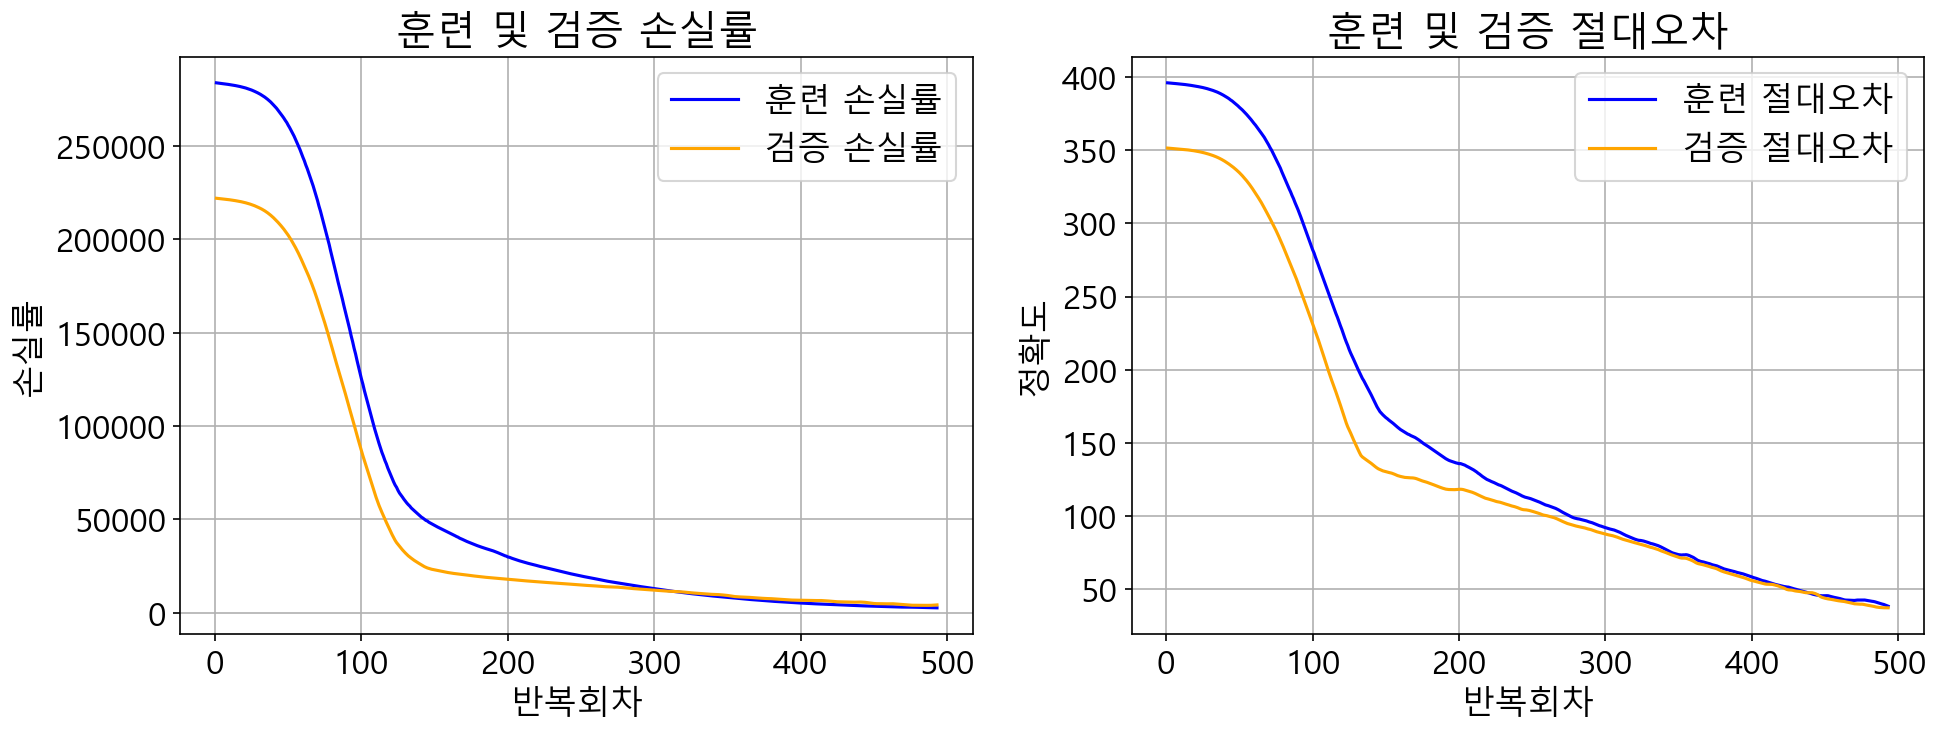

In [106]:
# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()


In [107]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 14ms/step - loss: 2639.6057 - mae: 38.0616
최종 훈련 손실률: 2639.605713, 최종 훈련 절대오차: 38.061623
1/1 [==============================] - 0s 50ms/step - loss: 4213.2217 - mae: 37.2985
최종 검증 손실률: 4213.221680, 최종 검증 절대오차: 37.298485


## 08. 학습 결과 적용
테스트 데이터에 대한 예측 결과 산정

In [108]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


1/1 [==============================] - 0s 53ms/step


#### 결과 데이터 셋 구성


In [111]:
train_df = DataFrame(x_train, columns=x2.columns)
train_df['무게(관측치)'] = y_train
train_df['무게(예측치)'] = train_pred.flatten()

train_df['훈련오차'] = train_df['무게(관측치)'] -train_df['무게(예측치)']

train_df.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게(관측치),무게(예측치),훈련오차
8,-0.927534,-0.954292,-0.969558,0.860320,0.885138,0.899298,0.910672,0.925241,0.940042,85.0,105.190025,-20.190025
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479,5.9,47.069416,-41.169416
15,-0.659101,-0.779008,-0.696689,0.434414,0.513445,0.459188,0.606854,0.542726,0.485375,120.0,124.510841,-4.510841
26,-0.368297,-0.396891,-0.327179,0.135643,0.146174,0.120499,0.157523,0.129854,0.107046,188.0,149.321350,38.678650
51,1.577847,1.731046,1.207709,2.489601,2.731326,1.905580,2.996521,2.090600,1.458561,1100.0,1001.203003,98.796997


In [115]:
test_df = DataFrame(x_test, columns=x2.columns)
test_df['무게(관측치)'] = y_test
test_df['무게(예측치)'] = test_pred.flatten()

test_df['훈련오차'] = test_df['무게(관측치)']-test_df['무게(예측치)']

test_df.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게(관측치),무게(예측치),훈련오차
16,-0.659101,-0.614242,-0.696689,0.434414,0.404847,0.459188,0.377294,0.427936,0.485375,130.0,128.496460,1.503540
12,-0.770948,-0.761480,-0.611417,0.594361,0.587062,0.471371,0.579852,0.465582,0.373831,125.0,116.157120,8.842880
21,-0.580807,-0.670333,-0.634156,0.337337,0.389334,0.368323,0.449346,0.425096,0.402154,145.0,130.620270,14.379730
33,-0.043940,-0.204080,-0.099788,0.001931,0.008967,0.004385,0.041649,0.020365,0.009958,250.0,195.973206,54.026794
36,0.235678,-0.084887,0.013907,0.055544,-0.020006,0.003278,0.007206,-0.001181,0.000193,320.0,232.222137,87.777863


In [118]:
def getTrend(x, y, degree=2, value_count=100):
    #[ a, b, c ] ==> ax^2 + bx + c
    coeff = np.polyfit(x, y, degree)
    
    if type(x) == 'list':
        minx = min(x)
        maxx = max(x)
    else:
        minx = x.min()
        maxx = x.max()
        
    Vtrend = np.linspace(minx, maxx, value_count)
    
    Ttrend = coeff[-1]
    for i in range(0, degree):
        Ttrend += coeff[i] * Vtrend ** (degree - i)
        
    return (Vtrend, Ttrend)

In [119]:
def regplot(x_left, y_left, y_left_pred= None, left_title = None, x_right = None, y_right = None, y_right_pred = None, right_title = None, figsize = (10,5)):
    subcount = 1 if x_right is None else 2

    fig, ax = plt.subplots(1, subcount, figsize = figsize)

    axmain = ax if subcount == 1 else ax[0]

    # 왼쪽 산점도
    sb.scatterplot(x = x_left, y = y_left, label ='data', ax = axmain)

    # 왼쪽 추세선
    x, y = getTrend(x_left, y_left)
    sb.lineplot(x=x, y=y, color = 'blue', linestyle = "--", ax = axmain)

    if y_left_pred is None:
        sb.scatterplot(x = x_left, y = y_left_pred, label = 'predict', ax = axmain)
        x, y = getTrend(x_left, y_left_pred)
        sb.lineplot( x = x, y = y, color = 'red', linestyle = "--", ax = axmain)

    if left_title is not None:
        axmain.set_title(left_title)

    axmain.legend()
    axmain.grid()

    if x_right is not None:
        # 오른쪽 산점도
        sb.scatterplot(x = x_right,  y = y_right, label = 'data', ax = ax[1])

        # 오른쪽 추세선
        x, y = getTrend(x_right, y_right)
        sb.lineplot(x = x, y=y, color = 'blue', linestyle = '--', ax = ax[1])

        if y_right_pred is not None:
            sb.scatterplot(x = x_right, y= y_right_pred, label = 'predict' , ax=ax[1])
            # 추정치에 대한 추세선
            x, y = getTrend(x_right, y_right_pred)
            sb.lineplot(x = x, y = y, color = 'red', linestyle = "--", ax = ax[1])
        
        if right_title is not None:
            ax[1].set_title(right_title)

        ax[1].legend()
        ax[1].grid()
        
    plt.show()
    plt.close()            

    

In [121]:
x2.columns

Index(['길이', '높이', '두께', '길이^2', '길이 높이', '길이 두께', '높이^2', '높이 두께', '두께^2'], dtype='object')

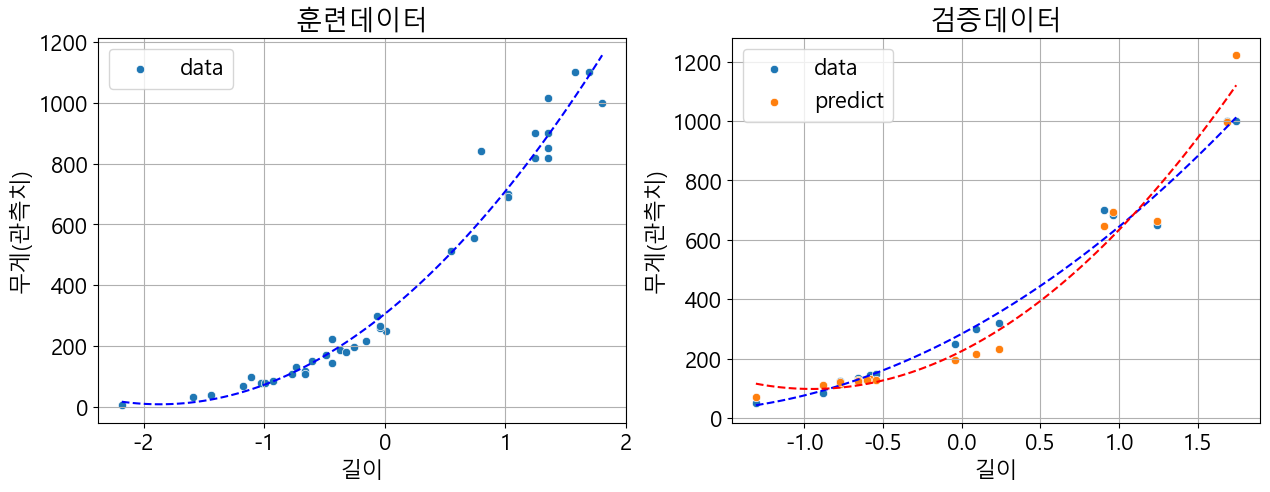

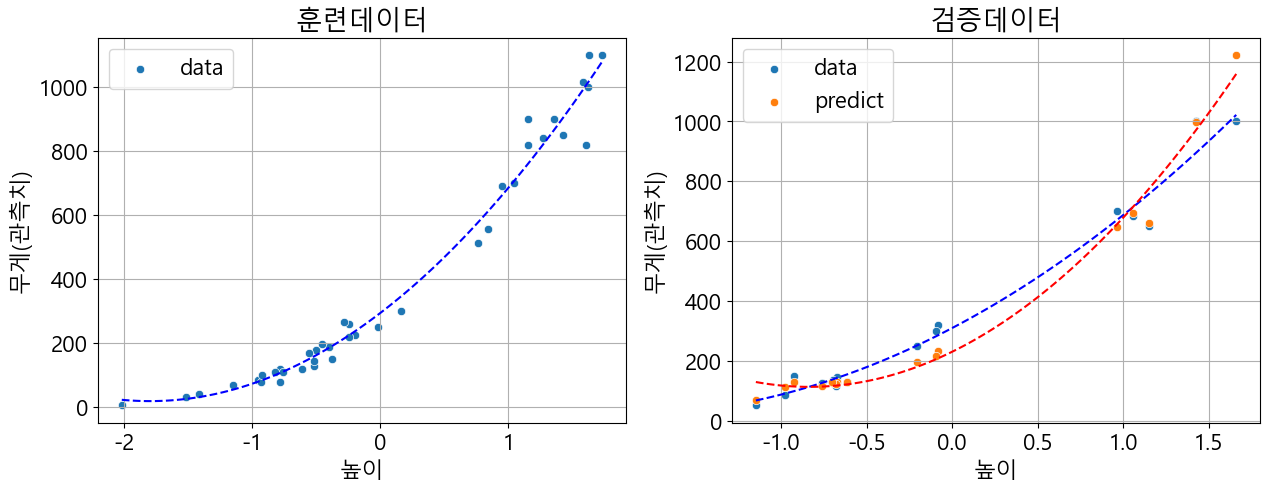

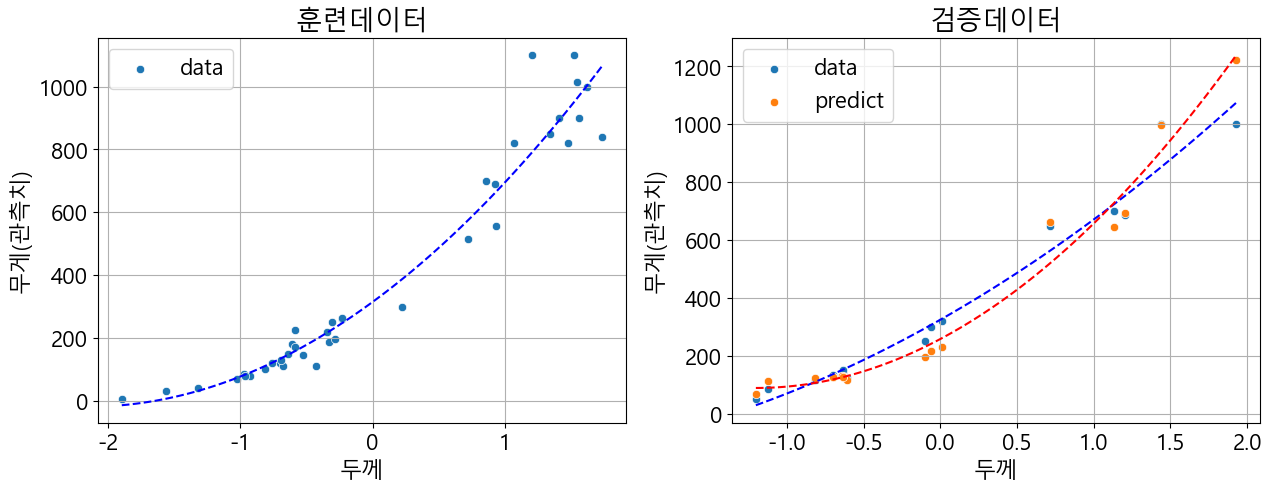

In [123]:
for key in ['길이', '높이', '두께']:
    regplot(train_df[key], train_df['무게(관측치)'], train_df['무게(예측치)'], "훈련데이터",
                   test_df[key], test_df['무게(관측치)'], test_df['무게(예측치)'], "검증데이터",
                   figsize=(15, 5))